In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
sns.set(color_codes=True)

In [4]:
df_used_10 = pd.read_csv("/Volumes/userdata/student_users/bikashkumarbhandari/results_n20_hmm/scores/scores_20181219-144455.csv")
df_unused_10 = pd.read_csv("/Volumes/userdata/student_users/bikashkumarbhandari/results_n20_hmm/scores/scores_20181219-144613.csv")
df_val = pd.read_csv("/Volumes/userdata/student_users/bikashkumarbhandari/results_n20_hmm/scores/scores_20181219-144635.csv")
df_train = pd.read_csv("/Volumes/userdata/student_users/bikashkumarbhandari/results_n20_hmm/scores/scores_20181219-144530.csv")

In [96]:
#df_used_10.head()

In [5]:
scores_used_10 = df_used_10["scores"]
scores_unused_10 = df_unused_10["scores"]
scores_val = df_val["scores"]
scores_train = df_train["scores"]

In [38]:
#sns.jointplot(x=np.linspace(0,len(scores_unused_10),len(scores_unused_10)),y=scores_unused_10)
#sns.jointplot(x=np.linspace(0,len(scores_val),len(scores_val)),y=scores_val)
#plt.show()

In [6]:
#grabing mean_prot for each set

scores_unused_10_all = pd.read_csv("/Volumes/userdata/student_users/bikashkumarbhandari/Projects/Testing/test/test_unused_cluster__10_.csv")

#scores_unused_10_all['sequence'] == df_unused_10['sequences']


scores_used_10_all = pd.read_csv("/Volumes/userdata/student_users/bikashkumarbhandari/Projects/Testing/test/test_used_cluster__10_.csv")
scores_val_all = pd.read_csv("/Volumes/userdata/student_users/bikashkumarbhandari/Projects/Testing/test/validaiton_sequences.csv")
scores_train_all = pd.read_csv("/Volumes/userdata/student_users/bikashkumarbhandari/Projects/Testing/test/training_sequences.csv")

In [7]:
#for grid plot on seaborn.jointplot

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import numpy as np

class SeabornFig2Grid():

    def __init__(self, seaborngrid, fig,  subplot_spec):
        self.fig = fig
        self.sg = seaborngrid
        self.subplot = subplot_spec
        if isinstance(self.sg, sns.axisgrid.FacetGrid) or \
            isinstance(self.sg, sns.axisgrid.PairGrid):
            self._movegrid()
        elif isinstance(self.sg, sns.axisgrid.JointGrid):
            self._movejointgrid()
        self._finalize()

    def _movegrid(self):
        """ Move PairGrid or Facetgrid """
        self._resize()
        n = self.sg.axes.shape[0]
        m = self.sg.axes.shape[1]
        self.subgrid = gridspec.GridSpecFromSubplotSpec(n,m, subplot_spec=self.subplot)
        for i in range(n):
            for j in range(m):
                self._moveaxes(self.sg.axes[i,j], self.subgrid[i,j])

    def _movejointgrid(self):
        """ Move Jointgrid """
        h= self.sg.ax_joint.get_position().height
        h2= self.sg.ax_marg_x.get_position().height
        r = int(np.round(h/h2))
        self._resize()
        self.subgrid = gridspec.GridSpecFromSubplotSpec(r+1,r+1, subplot_spec=self.subplot)

        self._moveaxes(self.sg.ax_joint, self.subgrid[1:, :-1])
        self._moveaxes(self.sg.ax_marg_x, self.subgrid[0, :-1])
        self._moveaxes(self.sg.ax_marg_y, self.subgrid[1:, -1])

    def _moveaxes(self, ax, gs):
        #https://stackoverflow.com/a/46906599/4124317
        ax.remove()
        ax.figure=self.fig
        self.fig.axes.append(ax)
        self.fig.add_axes(ax)
        ax._subplotspec = gs
        ax.set_position(gs.get_position(self.fig))
        ax.set_subplotspec(gs)

    def _finalize(self):
        plt.close(self.sg.fig)
        self.fig.canvas.mpl_connect("resize_event", self._resize)
        self.fig.canvas.draw()

    def _resize(self, evt=None):
        self.sg.fig.set_size_inches(self.fig.get_size_inches())

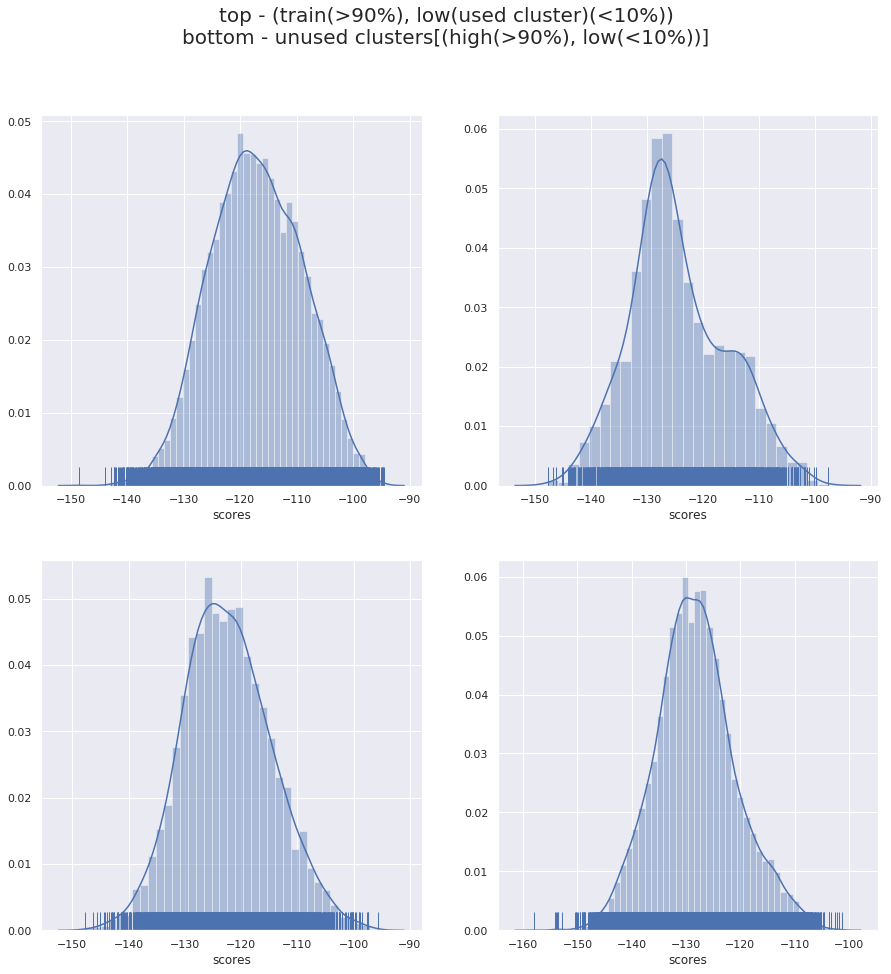

In [8]:
f, axes = plt.subplots(2, 2)
sns.distplot(scores_train, kde=True, rug=True, ax= axes[0][0])
sns.distplot(scores_used_10, kde=True, rug=True, ax= axes[0][1])
sns.distplot(scores_val, kde=True, rug=True, ax= axes[1][0])
sns.distplot(scores_unused_10, kde=True, rug=True, ax= axes[1][1])



fig11 = plt.gcf()
fig11.suptitle('top - (train(>90%), low(used cluster)(<10%))\nbottom - unused clusters[(high(>90%), low(<10%))]', fontsize = 20)
fig11.set_size_inches(15, 15)
plt.show()




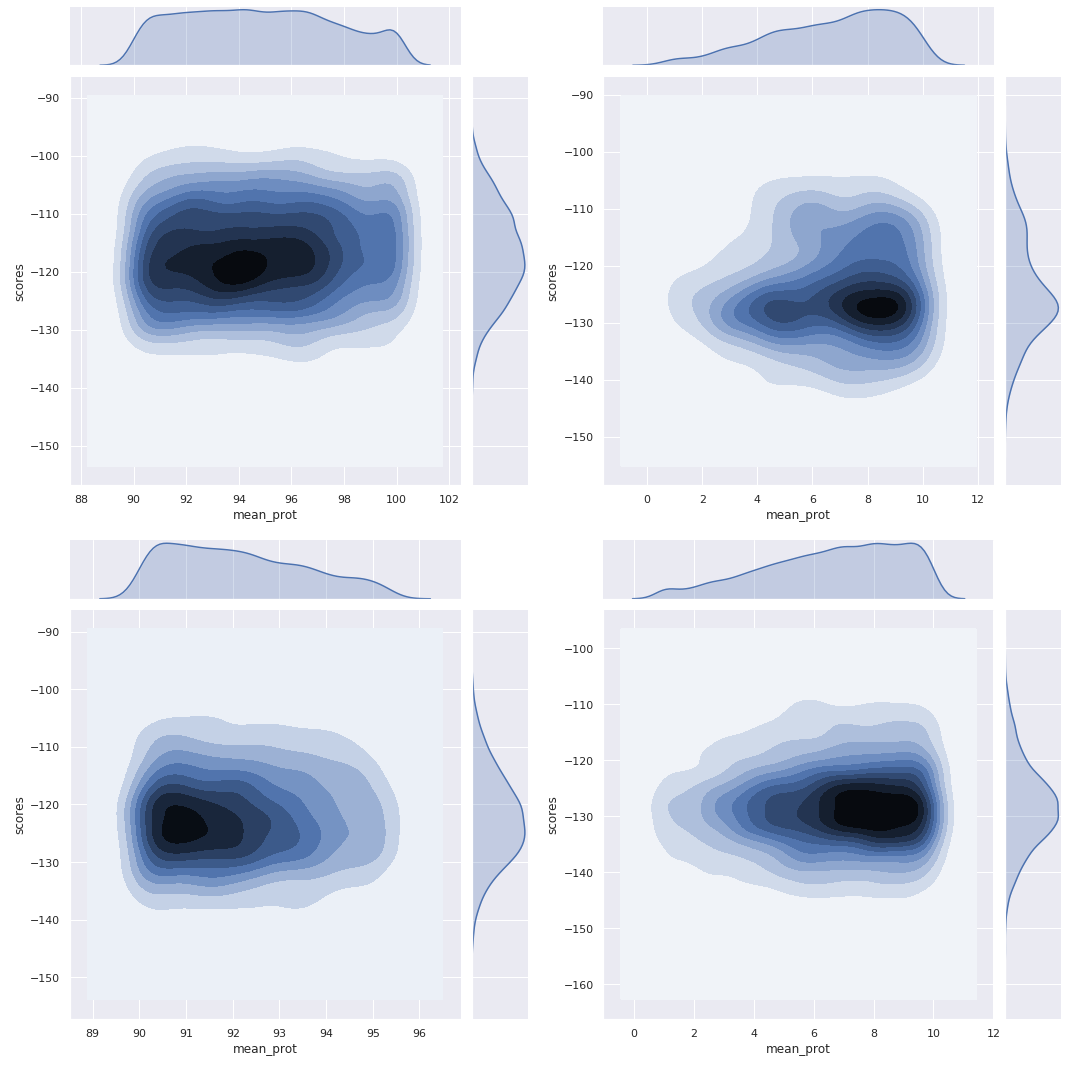

In [9]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns; sns.set()




g0=sns.jointplot(x=scores_train_all['mean_prot'],y=scores_train, kind='kde')
g1=sns.jointplot(x=scores_used_10_all['mean_prot'],y=scores_used_10,kind='kde')
g2=sns.jointplot(x=scores_unused_10_all['mean_prot'],y=scores_unused_10, kind='kde')
g3=sns.jointplot(x=scores_val_all['mean_prot'], y = scores_val,kind='kde')


fig = plt.figure(figsize=(15,15))
gs = gridspec.GridSpec(2, 2)

mg0 = SeabornFig2Grid(g0, fig, gs[0])
mg1 = SeabornFig2Grid(g1, fig, gs[1])
mg2 = SeabornFig2Grid(g2, fig, gs[3])
mg3 = SeabornFig2Grid(g3, fig, gs[2])

gs.tight_layout(fig)
#gs.update(top=0.7)
#fig.suptitle('top - (train(>90%), low(used cluster)(<10%))\nbottom - (val(>90%), low(unused cluster) (<10%))', fontsize = 20)

plt.show()

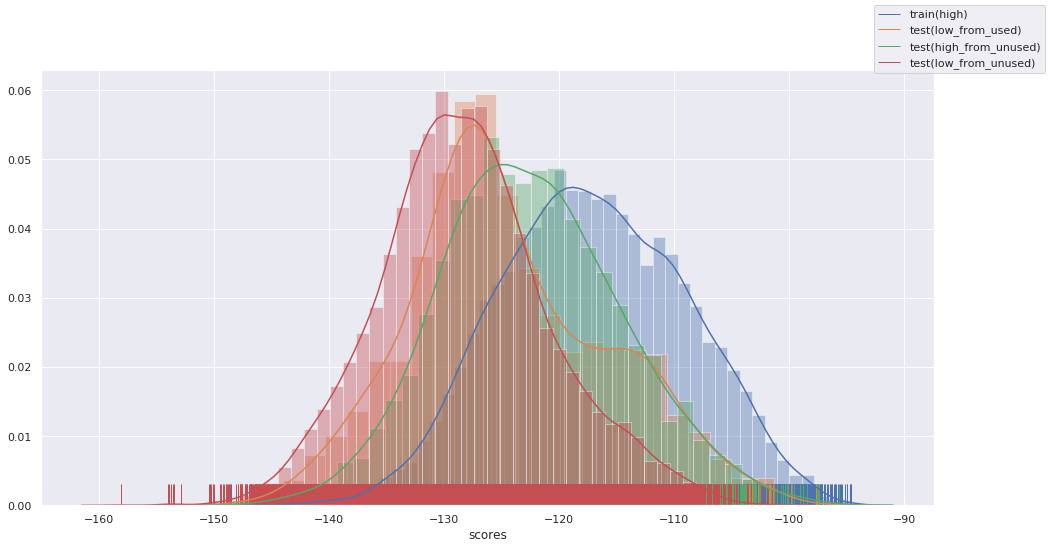

In [12]:
fig = plt.figure(figsize=(16,8))

sns.distplot(scores_train, kde=True, rug=True)
sns.distplot(scores_used_10, kde=True, rug=True)
sns.distplot(scores_val, kde=True, rug=True)
sns.distplot(scores_unused_10, kde=True, rug=True)
fig.legend(labels=['train(high)','test(low_from_used)','test(high_from_unused)','test(low_from_unused)'])
plt.show()